## Kalman Filter

### Steps
#### 1) Generate data
#### 2) Add random noise to the data
#### 3) Feed the noisy data into Kalman Filter
#### 4) Compare the result with the true values of the data

### Data
##### Kalman Filter takes in time series data as input and provide estimates for each time step. In this example, we're going to estimate the displacement and velocity of a moving vehicle. The vehicle starts at 2 m/s from a resting position with 0 acceleration. Acceleration will be introduced to the system at specific time steps.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializations
current_velocity = 2
current_displacement = 0
current_acceleration = 0
total_time = 100
#acceleration_dict holds the value of acceleration at different time steps.
acceleration_dict = {
    0:0,
    5:2,
    10: 8,
    20:-2,
    40:5,
    45: 9,
    60:-3,
    85:0
}

In [3]:
true_values = []

for t in range(1, total_time+1):
    
    #These calculations are based on basic kinematics equations.
    
    current_displacement = current_displacement + current_velocity + 0.5*current_acceleration
    
    #get the acceleration from the dictionary
    try:
        current_acceleration = acceleration_dict[t]
    except KeyError:
        pass
    
    current_velocity = current_velocity + current_acceleration
    
    #append displacement,velocity and acceleration in tuples.
    true_values.append((current_displacement, current_velocity, current_acceleration))

#### Add random noise to the true values

In [4]:
#the range to perturb the data
error_range = [700, 30, 15]
#list to keep the perturbed data as measurements.
measurement = []

In [5]:
for item in true_values:
    #unpack
    d,v,a = item
    
    random_err = [random.randint(-1*error_range[0], error_range[0]), random.randint(-1*error_range[1], error_range[1]), random.randint(-1*error_range[2], error_range[2])]
    
    #displacement will not go below 0
    new_displacement = d + random_err[0] if d+random_err[0] >0 else 0
    new_velocity = v + random_err[1]
    new_acceleration = a + random_err[2]
    
    measurement.append((new_displacement, new_velocity, new_acceleration))

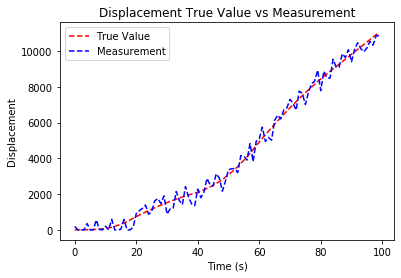

In [6]:
plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'b--', label='Measurement')

plt.title("Displacement True Value vs Measurement")
plt.ylabel("Displacement")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

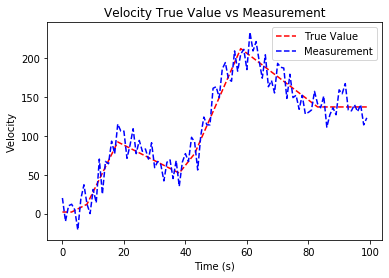

In [7]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')

plt.title("Velocity True Value vs Measurement")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

### Kalman Filter

In [8]:
#initialization

x_k = np.asarray([30,20]) #first estimate. elem 0 = displacement, elem 1 = velocity
Q = np.asarray([[0.004,0.002],[0.002,0.001]]) #Estimate error covariance
A = np.asarray([[1,1],[0,1]]) #Transition matrix. Displacement is updated with prev disp + curr vel while velocity is updated with prev vel (assuming we have no knowledge about the acceleration)
R = np.asarray([[0.4,0.01],[0.04,0.01]]) #Measurement error. This is higher than estimation error since we know our measurement contains a lot of noises.
H = np.asarray([[1,0],[0,1]]) #Observation matrix. We want every state from our state vector.
P = np.asarray([[0,0],[0,0]]) #Error matrix. 

In [9]:
estimation = []

for k_loop in range(total_time):
    
    #z_k is the measurement at every step
    z_k = np.asarray([measurement[k_loop][0], measurement[k_loop][1]])
    
    x_k = A.dot(x_k) #predict estimate
    P = (A.dot(P)).dot(A.T) + Q #predict error covariance
    
    K = (P.dot(H.T)).dot(np.linalg.inv((H.dot(P).dot(H.T)) + R)) #update Kalman Gain
    x_k = x_k + K.dot((z_k - H.dot(x_k))) #update estimate
    
    P = (np.identity(2) - K.dot(H)).dot(P) #update error covariance
    
    estimation.append((x_k[0], x_k[1])) #append the estimations

### Comparison

#### Displacement

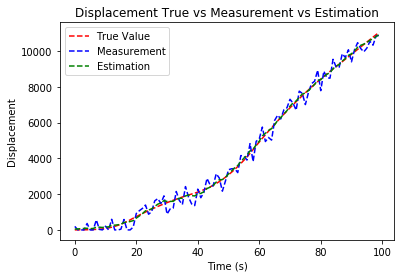

In [10]:
plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[0] for y in estimation], 'g--', label='Estimation')

plt.title("Displacement True vs Measurement vs Estimation")
plt.ylabel("Displacement")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

#### Velocity

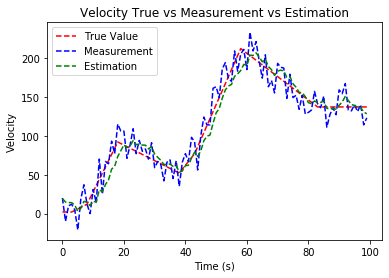

In [11]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[1] for y in estimation], 'g--', label='Estimation')


plt.title("Velocity True vs Measurement vs Estimation")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

### Summary

**It can be seen that Kalman filter estimates the displacement and velocity values as close as it can to the true values despite only knowing the noisy values. With more adjustment to the paremeters, Kalman Filter should be able to perform better than this.**